In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# 数据所在文件夹
base_dir = 'data/dogs-vs-cats'
train_dir = os.path.join(base_dir, 'train/train')
validation_dir = os.path.join(base_dir, 'validation/validation')

#Train
train_cats_dir = os.path.join(train_dir, 'cat_min')
train_dogs_dir = os.path.join(train_dir, 'dog_min')

#Validation
validation_cats_dir = os.path.join(validation_dir, 'cat_min')
validation_dogs_dir = os.path.join(validation_dir, 'dog_min')

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=1e-4),
             metrics=['accuracy'])

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(
        #文件夹路径
        train_dir,
        #数据图片大小
        target_size=(64,64),
        batch_size=10,
        #one-hot就是categorical，二分类就是binary
        class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64,64),
        batch_size=10,
        class_mode='binary'
)

Found 3584 images belonging to 2 classes.
Found 358 images belonging to 2 classes.


In [48]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=180,# images = batch_size * steps
    epochs=20,
    validation_data=validation_generator,
    validation_steps=18,
    verbose=2
)

Epoch 1/20
180/180 - 7s - loss: 2.8822 - accuracy: 0.4783 - val_loss: 1.0237 - val_accuracy: 0.5222
Epoch 2/20
180/180 - 7s - loss: 2.7945 - accuracy: 0.5111 - val_loss: 3.0943 - val_accuracy: 0.4722
Epoch 3/20
180/180 - 7s - loss: 2.3930 - accuracy: 0.5240 - val_loss: 5.0961 - val_accuracy: 0.5389
Epoch 4/20
180/180 - 7s - loss: 4.2722 - accuracy: 0.5067 - val_loss: 2.5624 - val_accuracy: 0.4944
Epoch 5/20
180/180 - 7s - loss: 3.3500 - accuracy: 0.5150 - val_loss: 6.4622 - val_accuracy: 0.5000
Epoch 6/20
180/180 - 7s - loss: 3.1756 - accuracy: 0.5217 - val_loss: 2.6307 - val_accuracy: 0.5556
Epoch 7/20
180/180 - 7s - loss: 3.4893 - accuracy: 0.5144 - val_loss: 2.5727 - val_accuracy: 0.4722
Epoch 8/20
180/180 - 7s - loss: 2.7474 - accuracy: 0.5117 - val_loss: 8.4630 - val_accuracy: 0.4778
Epoch 9/20
180/180 - 7s - loss: 4.4760 - accuracy: 0.5111 - val_loss: 3.9368 - val_accuracy: 0.4833
Epoch 10/20
180/180 - 7s - loss: 3.1615 - accuracy: 0.5173 - val_loss: 0.9533 - val_accuracy: 0.5611

In [49]:
history.history

{'loss': [2.882214069366455,
  2.7945289611816406,
  2.3929948806762695,
  4.272193431854248,
  3.3499650955200195,
  3.1756434440612793,
  3.4892773628234863,
  2.747356414794922,
  4.475955486297607,
  3.1615326404571533,
  3.91347599029541,
  2.51162052154541,
  6.000036239624023,
  4.447242259979248,
  4.057773590087891,
  2.827479124069214,
  3.124332904815674,
  3.0650267601013184,
  3.259317398071289,
  5.105868816375732],
 'accuracy': [0.47826087474823,
  0.5111482739448547,
  0.5239687561988831,
  0.5066666603088379,
  0.5149999856948853,
  0.5216666460037231,
  0.5144444704055786,
  0.5116666555404663,
  0.5111111402511597,
  0.5172798037528992,
  0.5122222304344177,
  0.5116666555404663,
  0.5161111354827881,
  0.5105908513069153,
  0.5149999856948853,
  0.5183946490287781,
  0.5005555748939514,
  0.5172222256660461,
  0.5027777552604675,
  0.5249999761581421],
 'val_loss': [1.023724913597107,
  3.094259262084961,
  5.096056938171387,
  2.5623972415924072,
  6.46221637725830

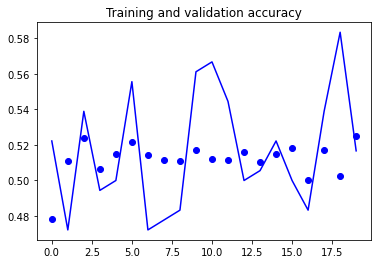

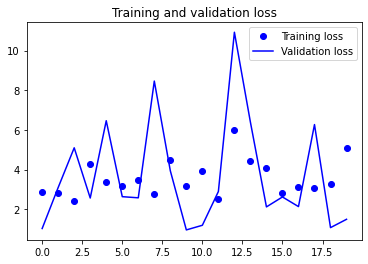

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.show()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# 图像增强

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from keras.preprocessing import image
import keras.backend as K
import os
import glob
import numpy as np

In [24]:
def print_result(path):
    name_list = glob.glob(path)
    fig = plt.figure(figsize=(12,16))
    for i in range(3):
        img = Image.open(name_list[i])
        sub_img = fig.add_subplot(161+i)
        sub_img.imshow(img)

In [25]:
img_path = './img/test/*'
in_path = './img/'
out_path = './output/'
name_list = glob.glob(img_path)
name_list

['./img/test\\cat.0.jpg',
 './img/test\\cat.1.jpg',
 './img/test\\cat.2.jpg',
 './img/test\\cat.3.jpg',
 './img/test\\cat.4.jpg',
 './img/test\\cat.5.jpg']

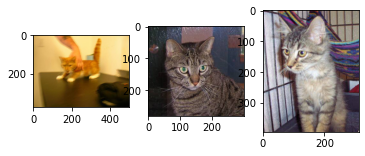

In [26]:
print_result(img_path)

In [27]:
datagen = image.ImageDataGenerator()
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False,
                                      save_to_dir=out_path,
                                      save_prefix='gen', target_size=(224,224))

Found 6 images belonging to 1 classes.


In [28]:
for i in range(6):
    gen_data.next()

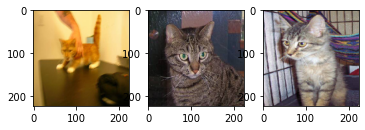

In [29]:
print_result(out_path+'*')

# 旋转角度

In [9]:
datagen = image.ImageDataGenerator(rotation_range=45)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'rotation_range',
                                       save_prefix='gen',target_size=(224,224))
for i in range(3):
    gen_data.next()

Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


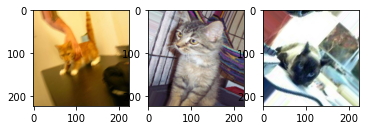

In [10]:
print_result(out_path+'rotation_range/*')

# 平移变换

In [11]:
datagen = image.ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.3)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'shift',
                                       save_prefix='gen',target_size=(224,224))
for i in range(3):
    gen_data.next()

Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


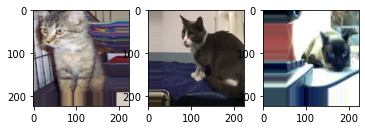

In [12]:
print_result(out_path+'shift/*')

# 缩放

In [33]:
datagen = image.ImageDataGenerator(zoom_range=0.5)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'zoom',
                                       save_prefix='gen',target_size=(224,224))
for i in range(6):
    gen_data.next()

Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.


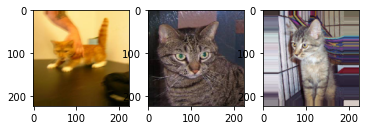

In [34]:
print_result(out_path+'zoom/*')

# 翻转

In [39]:
datagen = image.ImageDataGenerator(horizontal_flip=True)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'horizontal',
                                       save_prefix='gen',target_size=(224,224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


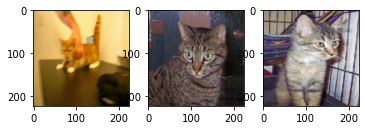

In [40]:
print_result(out_path+'horizontal/*')

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


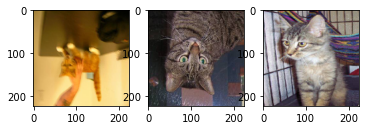

In [43]:
datagen = image.ImageDataGenerator(vertical_flip=True)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'horizontal',
                                       save_prefix='gen',target_size=(224,224))
for i in range(3):
    gen_data.next()
    
print_result(out_path+'horizontal/*')

In [44]:
gen_data.next()

(array([[[[ 32.,  30.,  31.],
          [ 25.,  23.,  24.],
          [ 21.,  19.,  20.],
          ...,
          [ 59.,  46.,  38.],
          [ 51.,  38.,  30.],
          [ 40.,  30.,  21.]],
 
         [[ 32.,  30.,  31.],
          [ 26.,  24.,  25.],
          [ 22.,  20.,  21.],
          ...,
          [ 44.,  31.,  23.],
          [ 42.,  29.,  21.],
          [ 55.,  45.,  36.]],
 
         [[ 29.,  27.,  28.],
          [ 25.,  23.,  24.],
          [ 22.,  20.,  21.],
          ...,
          [ 50.,  37.,  31.],
          [ 41.,  28.,  22.],
          [ 49.,  38.,  32.]],
 
         ...,
 
         [[ 39.,  44.,  40.],
          [ 38.,  42.,  41.],
          [ 37.,  41.,  42.],
          ...,
          [195., 191., 166.],
          [198., 193., 164.],
          [205., 200., 168.]],
 
         [[ 40.,  45.,  41.],
          [ 40.,  44.,  43.],
          [ 41.,  45.,  46.],
          ...,
          [207., 203., 176.],
          [203., 200., 169.],
          [197., 195., 157.

# rescale

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


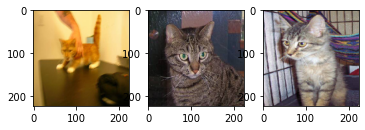

In [45]:
datagen = image.ImageDataGenerator(rescale=1/255)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'rescale',
                                       save_prefix='gen',target_size=(224,224))
for i in range(3):
    gen_data.next()
    
print_result(out_path+'rescale/*')

In [46]:
gen_data.next()

(array([[[[0.25490198, 0.21176472, 0.20392159],
          [0.18823531, 0.14117648, 0.14117648],
          [0.20784315, 0.16862746, 0.16470589],
          ...,
          [0.627451  , 0.60784316, 0.53333336],
          [0.5764706 , 0.5568628 , 0.48235297],
          [0.43137258, 0.4039216 , 0.33333334]],
 
         [[0.34901962, 0.28235295, 0.30588236],
          [0.21176472, 0.14509805, 0.1764706 ],
          [0.20784315, 0.14117648, 0.17254902],
          ...,
          [0.6901961 , 0.6627451 , 0.5921569 ],
          [0.654902  , 0.627451  , 0.5568628 ],
          [0.43137258, 0.39607847, 0.32941177]],
 
         [[0.41176474, 0.32941177, 0.4039216 ],
          [0.43137258, 0.34901962, 0.42352945],
          [0.37254903, 0.2901961 , 0.3647059 ],
          ...,
          [0.6039216 , 0.5568628 , 0.49411768],
          [0.5647059 , 0.5176471 , 0.454902  ],
          [0.4666667 , 0.4156863 , 0.3529412 ]],
 
         ...,
 
         [[0.54901963, 0.52156866, 0.5529412 ],
          [0.24705

# 填充方法

- constant: kkkkkk|abcd|kkkkkk(cval=k)
- nearest: aaaaaa|abcd|dddddd
- reflect: abcddcba|abcd|dcbaabcd
- wrap: abcdabcd|abcd|abcdabcd

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


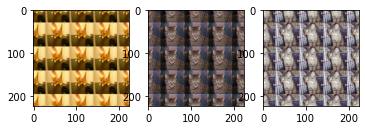

In [47]:
datagen = image.ImageDataGenerator(fill_mode='wrap', zoom_range=[4,4])
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1,class_mode=None, shuffle=True, target_size=(224,224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, 
                                       shuffle=True, save_to_dir=out_path+'fill_mode',
                                       save_prefix='gen',target_size=(224,224))
for i in range(3):
    gen_data.next()
    
print_result(out_path+'fill_mode/*')